# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [7]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0.0

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2 / n_samples) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.w) + self.b
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = LinearRegression(lr=0.01, epochs=3000)
model.fit(X, y)

print("Weights:", model.w)
print("Bias:", model.b)
print("Predictions:", model.predict([[6], [7]]))



Weights: [1.99999449]
Bias: 1.9903013893904882e-05
Predictions: [11.99998683 13.99998131]


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

Using Colab cache for faster access to the 'real-estate-price-prediction' dataset.


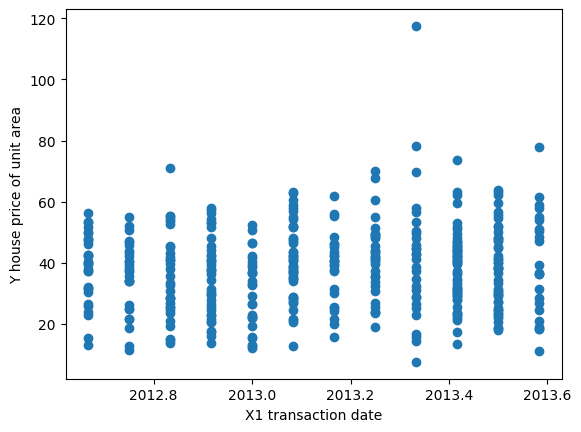

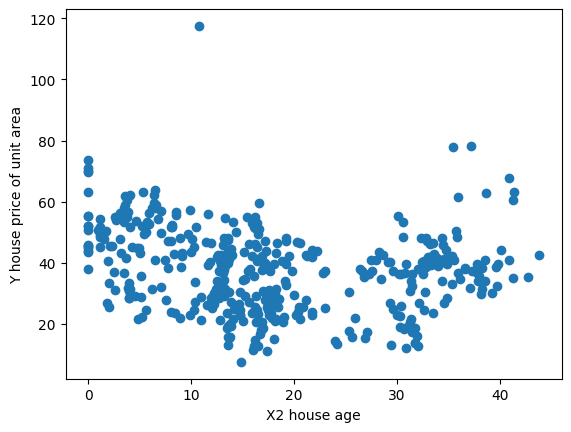

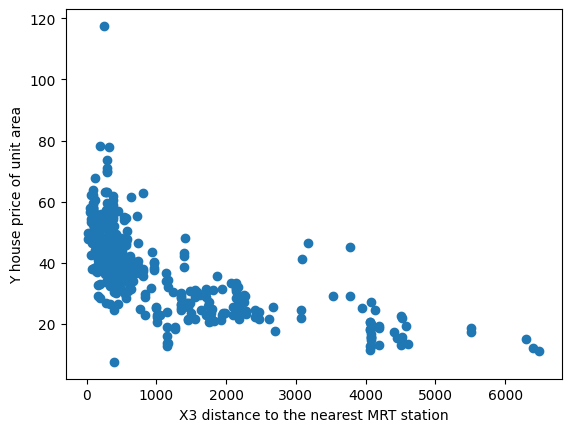

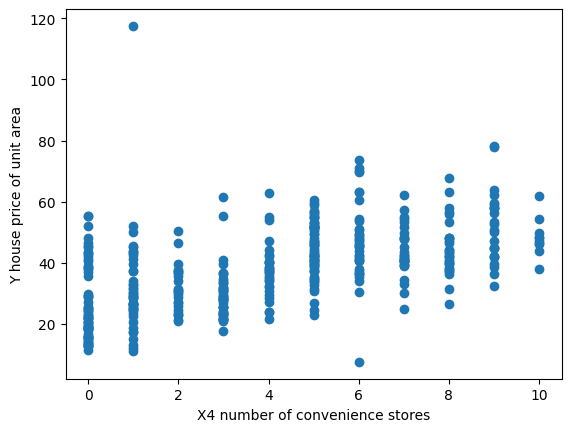

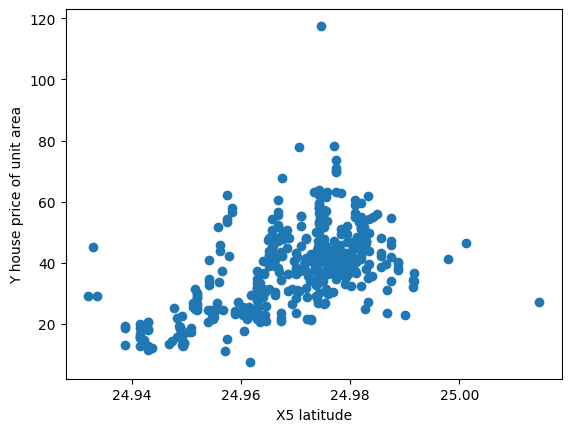

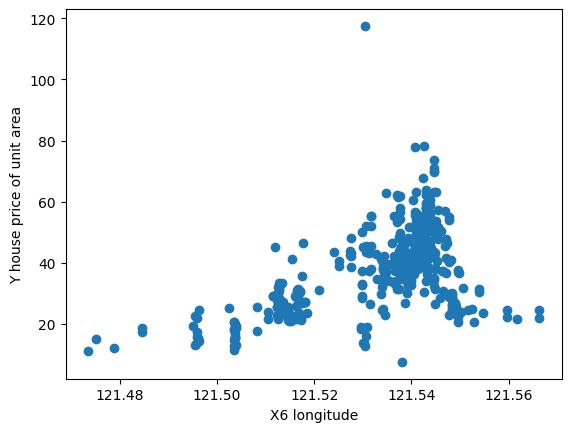

69.04778198840724 0.5646930570112327
66.6733627183596 0.579662418286177
0.1 500 65.10548974150609
0.1 1000 65.16454788330417
0.1 3000 66.1838837740984
0.01 500 76.95180623631373
0.01 1000 69.04778198840724
0.01 3000 65.51308766823853
0.001 500 113.90171759053555
0.001 1000 106.70140336051794
0.001 3000 86.72263353121525
(0.1, 500) 65.10548974150609


In [8]:
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

path = kagglehub.dataset_download("quantbruce/real-estate-price-prediction")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

df = df.dropna()

features = df.columns[1:-1]
target = df.columns[-1]

for col in features:
    plt.figure()
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

df = df.drop(df.columns[0], axis=1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression(lr=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)
y_pred_custom = model.predict(X_test_scaled)

print(mean_squared_error(y_test, y_pred_custom), r2_score(y_test, y_pred_custom))

sk_model = SklearnLinearRegression()
sk_model.fit(X_train_scaled, y_train)
y_pred_sk = sk_model.predict(X_test_scaled)

print(mean_squared_error(y_test, y_pred_sk), r2_score(y_test, y_pred_sk))

learning_rates = [0.1, 0.01, 0.001]
epochs_list = [500, 1000, 3000]

best_mse = float("inf")

for lr in learning_rates:
    for ep in epochs_list:
        model = LinearRegression(lr=lr, epochs=ep)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, preds)
        print(lr, ep, mse)
        if mse < best_mse:
            best_mse = mse
            best_params = (lr, ep)

print(best_params, best_mse)


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


5. Write code for the sigmoid function and Logistic regression.


In [2]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred = (y_pred >= 0.5).astype(int)
        return y_pred


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [3]:
from sklearn.linear_model import LogisticRegression as SkLogReg
from sklearn.metrics import accuracy_score

custom_model = LogisticRegression(0.01, 3000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

print("Custom Accuracy:", accuracy_score(y_test, y_pred_custom))

sk_models = [
    ("No penalty", SkLogReg(penalty=None, solver="lbfgs", max_iter=5000)),
    ("L2", SkLogReg(penalty="l2", solver="lbfgs", max_iter=5000)),
    ("L1", SkLogReg(penalty="l1", solver="liblinear", max_iter=5000)),
    ("ElasticNet", SkLogReg(penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=5000))
]

best_sk_acc = 0
best_sk_name = ""
y_pred_sklearn = None

for name, sk_model in sk_models:
    sk_model.fit(X_train, y_train)
    preds = sk_model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(name, "Accuracy:", acc)
    if acc > best_sk_acc:
        best_sk_acc = acc
        best_sk_name = name
        y_pred_sklearn = preds


Custom Accuracy: 0.993006993006993
No penalty Accuracy: 0.9370629370629371
L2 Accuracy: 0.9790209790209791
L1 Accuracy: 0.9790209790209791
ElasticNet Accuracy: 0.9790209790209791


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [4]:
from sklearn.metrics import classification_report

print("=== Custom Logistic Regression : Classification Report ===")
print(classification_report(y_test, y_pred_custom))

print("\n=== Best Sklearn Logistic Regression : Classification Report ===")
print(classification_report(y_test, y_pred_sklearn))
from sklearn.metrics import confusion_matrix

print("=== Custom Logistic Regression : Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_custom))

print("\n=== Best Sklearn Logistic Regression : Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_sklearn))



=== Custom Logistic Regression : Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


=== Best Sklearn Logistic Regression : Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

=== Custom Logistic Regression : Confusion Matrix ===
[[53  1]
 [ 0 89]]

=== Best Sklearn Logistic Regression : Confusion Matrix ===
[[53  1]
 [ 2 87]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [9]:
!pip install kagglehub

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("uciml/glass")

df = pd.read_csv(f"{path}/glass.csv")

X = df.drop(columns=["Type"])
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape






Using Colab cache for faster access to the 'glass' dataset.


((171, 9), (43, 9), (171,), (43,))

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [10]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(Counter(k_labels).most_common(1)[0][0])
        return np.array(predictions)
knn = KNN(k=5)
knn.fit(X_train, y_train)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [11]:
from sklearn.metrics import accuracy_score

for k in [1, 3, 5, 7, 9]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(k, acc)


1 0.6511627906976745
3 0.6511627906976745
5 0.6744186046511628
7 0.6744186046511628
9 0.6046511627906976


In [12]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
sk_knn.fit(X_train, y_train)

y_pred_sk = sk_knn.predict(X_test)
sk_acc = accuracy_score(y_test, y_pred_sk)

sk_acc


0.6744186046511628